# R Coding Assignment \#7: Expectation

### Sheetal Parikh
EN.605.631.81<br>
October 18, 2020
***
***

## Problem 1

In Arlington, VA the cost of a parking citation is 40 dollars.  Parking attendants who look for those who park illegally and write citations vary their routes.  The time between a parking attendant visiting the same spot twice follows a uniform distribution with an expected time of 6 hours.  Assume the cost of parking is 3 dollars/hour.

a.) If you parked illegally for 5 hours, what is the probability that you receive a citation?

b.) If you parked illegally for 5 hours, what is the expected cost for your parking?

c.) If you parked legally for 5 hours, what is the cost of your parking?

d.) Does it make sense to pay for parking?

We are given the expected time of the parking attendant visiting the same spot twice is 6 hours and is a uniform distribution. Therefore, if T = the time that the parking attendant checks the parked cars for citations, then E[T] = 6.  Because we are given that T is a uniform distribution we know that E[T] = (a + b)/2 = 6. If we solve for the a + b, we get that a + b = 12.  The 12 hours represents the number of hours that the parking attendant enforces the parking rules.  For all the questions, we are assuming that the attendant can write one citation to an illegally parked car at any time within these 12 hours.

a.) If you parked illegally for 5 hours, what is the probability that you receive a citation? 

We need to first find the pdf.  The pdf of T is 1/12 because we know that T is a uniform distribution and we determined above that you can receive a citation within the 12 hour duration that the parking attendant checks the parked cars.  In order to find the probability that a car that parked illegally for 5 hours receives a citation, we are determining the probability that the parking attendant checks the parked cars during a 5 hour period which would be the area under the distribution from times 0  to 5.  Because T is a uniform distribution, the probability is for any five hour period which is equally likely. For example, the probability of a car being checked between 8am - 1pm would be the same as the probability of a car being checked between 1pm to 6pm.  

As seen below, the probability of receiving a citation if you parked illegally for 5 hours is determined to be 5/12 = 0.4167.

In [1]:
####Finding P(0<T<5) = P(T<5)####

#parking duration of 5 hours
t <- 5

#range of time that parking attendant checks the parked cars
a <-0
b <-12

#P(T<5)
p_5 <-punif(t,a,b)
cat("P(T<5): ",p_5)

P(T<5):  0.4166667

Below we can see how we could visualize the probability that you recived a citation if parking illegally for 5 hours.

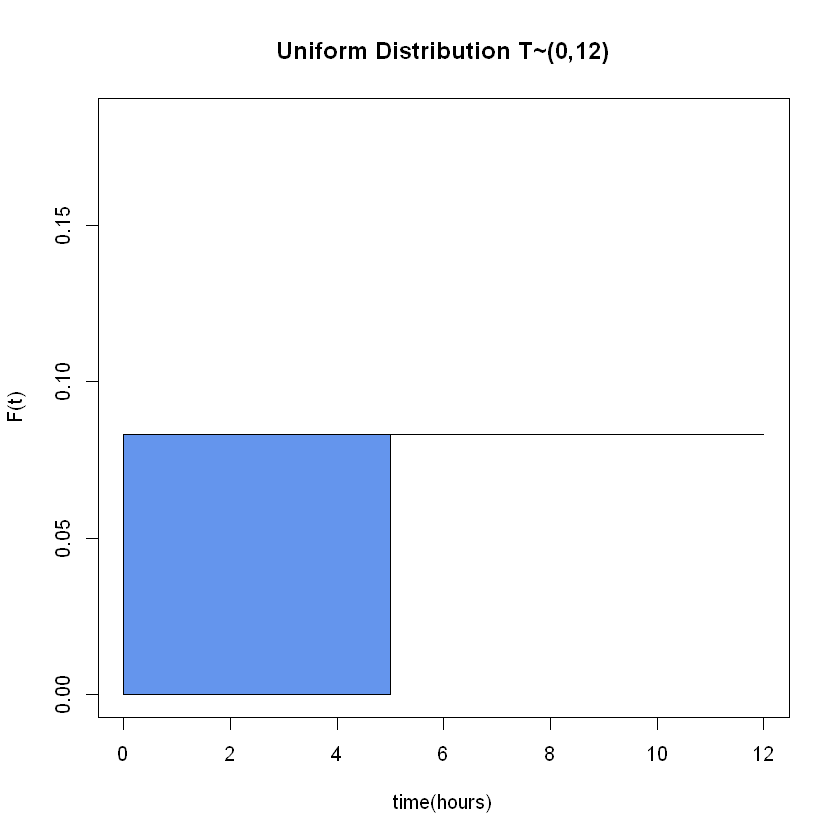

In [2]:
#Plotting the uniform distribution
x = seq(a,b,0.01)
y = dunif(x,a,b)

#adding line at 1/(b-a) = 1/12
plot(x, y, type="l", ylim=c(0,max(y)+0.1), main="Uniform Distribution T~(0,12)",
    xlab="time(hours)", ylab = "F(t)")

#adding area under the curve at P(T<5)
cord.a = c(a, seq(a, t, 0.01), t)
cord.b = c(0, dunif(seq(a, t, 0.01), a, b), 0)
polygon(cord.a, cord.b, col="cornflowerblue")


b.) If you parked illegally for 5 hours, what is the expected cost for your parking?

The expected cost of your parking for parking illegally would the probability you received a citation times the cost of the citation(40 dollars) plus the probability you didn't receive the citation times 0 (since you didn't pay for parking): P(T<5) * 40 + (1-P(T<5))* 0 = 16.67

In [3]:
#Finding Expected Cost of Parking
citation <- 40

expectedCost <- round(p_5 * citation,2)

cat("Expected cost of parking illegally: ", expectedCost)

Expected cost of parking illegally:  16.67

c.) If you parked legally for 5 hours, what is the cost of your parking?

We are given that parking legally is 3 dollar/hour.  Therefore, if you park for 5 hours, your total cost of parking would be
3 * 5 = 15 dollars

In [4]:
#Finding Cost of Parking if parked legally
parking <- 3
duration <- 5

legalcost<- parking * duration

cat("Total Cost for Parking Legally: $", legalcost)

Total Cost for Parking Legally: $ 15

d.) Does it make sense to pay for parking?

For a duration of 5 hours, it does make sense to pay for parking as the expected cost of parking illegally will always be greater than the total cost of parking legally.  As can be seen in the examples printed below for problem 2, even with a duration of 12 hours, the expected cost of parking illegaly is still greater than parking legally.  As the hourly cost of parking legally increases, it makes more sense to park illegally.  For example, as seen below in the printed examples for problem 2, if the hourly cost of parking legally is 10 dollars and the cost of a citation stays the same at 40 dollars, it makes more sense to park illegally as the expected cost of parking illegally is smaller than the cost of parking legally.

## Problem 2
Write a function in R to calculate the expected cost you will pay to park illegally.  Your function should allow you to input the parking duration and the cost to park per hour.  Your function should output the expected cost for parking legally and illegally.  Make the cost of a citation a hard-coded variable in your function.

For the function, we are assuming the cost of parking for a single day (12-hour period)

In [5]:
#function for expected cost to park illegally and cost to park legally

# e = parking duration
# f = cost to park per hour
# g = 40 : It costs $40 for a citation
calcCost <- function(e,f,g = 40){
    a <- 0
    b <- 12
        #cost 0 if negative duration or cost entered
        if (e < 0 || f < 0){
            legalcost <- 0
            illegalcost <- 0
        #capping parking cost at a duration of 12    
        } else if(e > 12){
            prob <-punif(12,a,b)
            legalcost <- f*12
            illegalcost <- round(prob*g,2)  
        #calculating    
        } else {
            a <- 0
            b <- 12
            prob <-punif(e,a,b)
            legalcost <- f*e
            illegalcost <- round(prob*g,2)
        }
        cat("Parking Duration: ",e, "hours")
        cat("\nCost to Park per Hour: $",f)
        cat("\nCost for Parking Legally: $", legalcost)
        cat("\nExpected Cost for Parking Illegally: $", illegalcost,"\n\n")
}

When we test out the function, we see that we get the same values we calculated for problem.  Also from the examples below, we see that if the cost of hourly parking increases (and the cost of a citation stays the same), it makes more sense to not pay for parking. If a negative duration or parking cost is entered, the function outputs a total legal and expected illegal cost of 0.  

In [6]:
#testing function with values from problem 1: cost to park is $3/hour and parking duration is 5 hours
calcCost(5,3)

calcCost(12,3)

#if duration longer than 12 hours, function caps parking cost for 12 hours
calcCost(15,3)

#example for Problem 1d
calcCost(6,10)

#example for Problem 1d
calcCost(1,10)

#if negative duration, function outputs a total legal cost and illegal expected cost of 0
calcCost(-6,10)

#if negative parking cost, function outputs a total legal cost and illegal expected cost of 0
calcCost(6,-10)

Parking Duration:  5 hours
Cost to Park per Hour: $ 3
Cost for Parking Legally: $ 15
Expected Cost for Parking Illegally: $ 16.67 

Parking Duration:  12 hours
Cost to Park per Hour: $ 3
Cost for Parking Legally: $ 36
Expected Cost for Parking Illegally: $ 40 

Parking Duration:  15 hours
Cost to Park per Hour: $ 3
Cost for Parking Legally: $ 36
Expected Cost for Parking Illegally: $ 40 

Parking Duration:  6 hours
Cost to Park per Hour: $ 10
Cost for Parking Legally: $ 60
Expected Cost for Parking Illegally: $ 20 

Parking Duration:  1 hours
Cost to Park per Hour: $ 10
Cost for Parking Legally: $ 10
Expected Cost for Parking Illegally: $ 3.33 

Parking Duration:  -6 hours
Cost to Park per Hour: $ 10
Cost for Parking Legally: $ 0
Expected Cost for Parking Illegally: $ 0 

Parking Duration:  6 hours
Cost to Park per Hour: $ -10
Cost for Parking Legally: $ 0
Expected Cost for Parking Illegally: $ 0 



## References

Uniform Distribution R Tutorial:
https://www.youtube.com/watch?v=i6WYqQ-yQCA